In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as r
import pandas as pd

In [2]:
x=np.linspace(-1,2,1000)
y=x*(np.sin(10*np.pi*x))+2

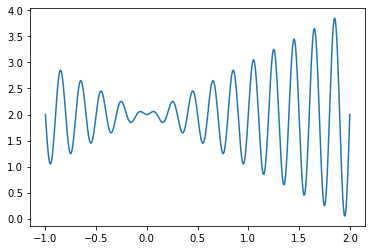

In [3]:
plt.plot(x,y)

In [3]:
def fitness(x):
    return x*np.sin(10*np.pi*x)+2.0

In [4]:
def init(popsize,resolution):
    population=[]
    for i in range(0,popsize):
        k1=[]
        sl=[]
        for j in range(0,resolution):
            k=r.randint(0,1)
            k1.append(k)
        if(k1 not in population):
            sl.append(k1)
            sl.append(fitness(bin_decode(k1)))
            population.append(sl)
    return np.array(population,dtype=object)

In [61]:
print(init(10,12))

[[1 0 0 1 0 0 1 1 1 1 1 1]
 [1 0 0 0 1 0 0 1 0 0 0 1]
 [1 0 0 0 1 0 0 0 0 1 1 0]
 [1 0 1 1 1 1 1 1 0 1 1 0]
 [0 0 1 1 0 1 1 0 0 1 0 1]
 [0 1 0 0 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 0 0 1 0 1 0 1]
 [1 1 1 0 1 1 0 1 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 0 1]
 [0 0 1 1 0 0 1 1 1 1 1 1]]


In [5]:
def bin_decode(chromosome):
    k=0
    for i in range(len(chromosome)):
        if(chromosome[i]==1):
            k+=pow(2,i)
    decoded=((k/pow(2,len(chromosome)))*(2+1))-1
    #print(decoded,fitness(decoded))
    return decoded

In [6]:
def crossover(popset1):
    popset=list(popset1)
    #print(len(popset))
    idx1=int(len(popset)/2)
    #idx2=r.randint(3,len(popset)-1)
    parent1=r.randint(0,len(popset)-1)
    parent2=r.randint(0,len(popset)-1)
    c1,c2=popset[parent1][0][:idx1]+popset[parent2][0][idx1:],popset[parent1][0][idx1:]+popset[parent2][0][:idx1]
    sl=[]
    sl.append(c1)
    sl.append(fitness(bin_decode(c1)))
    #print(sl)
   # np.append(popset,sl)
    
    popset.append(sl)
    
    sl.clear()
    sl.append(c2)
    sl.append(fitness(bin_decode(c2)))
    #print(sl)
    
    popset.append(sl)
    
   # popset=np.append(popset,sl)
    #popset+=np.array(sl,dtype=object)
    #print(len(popset3))
    
    return np.array(popset)
    

In [7]:
def mutation(chromosome):
    idx=r.randint(0,len(chromosome)-1)
    chromosome[idx]=int(not chromosome[idx])
    return chromosome


In [8]:
def selection(popset,selection_rate):
    sel_len=int(len(popset)*selection_rate)
    p1=list(popset)
    #p2=p1[0:sel_len//2]+p1[-sel_len//2:]
    p2=p1[0:sel_len//2]
    return np.array(p2)

In [257]:
x=init(10,12)



C:\Users\Admin\AppData\Local\Temp\ipykernel_9152\3691118681.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(population)


In [255]:
print(x[0])
print(mutation(x[0][0]))
print(x[0],fitness(bin_decode(x[0])))

TypeError: 'NoneType' object is not subscriptable

In [147]:
x.sort(axis=0)
print((x))

[[list([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]) 1.5355062357033986]
 [list([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]) 1.878745843831332]
 [list([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]) 1.9481145742083354]
 [list([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]) 1.964486353823852]
 [list([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]) 2.000046801904753]
 [list([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]) 2.020321432413501]
 [list([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]) 2.1944014074657536]
 [list([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]) 2.3622184217978215]
 [list([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]) 2.4318105410037907]
 [list([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]) 3.509485859251161]]


In [262]:
k=selection(x,0.4)
print(k)

[[list([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]) 2.0264258031396927]
 [list([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1]) 3.8377599132637434]
 [list([1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]) 0.08752648689848996]
 [list([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0]) 2.003880591051842]]


In [190]:
for i in range(2):
    x=crossover(x)
print(len(x))

70


C:\Users\Admin\AppData\Local\Temp\ipykernel_9152\2115771149.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(popset)


[1.09765625, 1.736328125, -0.2470703125, 1.69091796875, 1.23095703125, 1.631591796875, 0.776123046875, -0.433837890625, -0.967041015625, 1.867431640625]


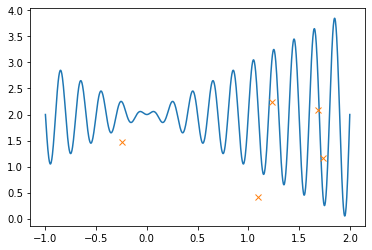

In [48]:
plt_pt=[i[-1] for i in x]
#print(plt_pt)
pl_x=[]
for i in range(len(x)):
    pl_x.append(bin_decode(x[i][0]))
print(pl_x)
x1=np.linspace(-1,2,1000)
y=x1*(np.sin(10*np.pi*x1))+2
plt.plot(x1,y)
plt.plot(pl_x[:5],plt_pt[:5],'x')

In [9]:
def plot(poplist):
    plt_pt=[i[-1] for i in poplist]

    pl_x=[]
    for i in range(len(poplist)):
        pl_x.append(bin_decode(poplist[i][0]))
    x1=np.linspace(-1,2,1000)
    y=x1*(np.sin(10*np.pi*x1))+2
    plt.plot(x1,y)
    plt.plot(pl_x,plt_pt,'x')

In [153]:
x

array([[list([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1]), 1.5355062357033986],
       [list([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1]), 1.878745843831332],
       [list([0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0]), 1.9481145742083354],
       [list([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0]), 1.964486353823852],
       [list([0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1]), 2.000046801904753],
       [list([1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0]), 2.020321432413501],
       [list([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]), 2.1944014074657536],
       [list([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1]), 2.3622184217978215],
       [list([1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0]), 2.4318105410037907],
       [list([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]), 3.509485859251161]],
      dtype=object)

In [10]:
def rem_dup(x):
    k1=[]
    k2=[]
    '''
    for k in range(len(x)):
        k1.append(tuple(x[:,0][k]))
    #k=(x[:,0][0])
    l=list(set(k1))
    for i in range(len(l)):
        print(l[i],bin_decode(l[i]),fitness(bin_decode(l[i])))
    '''
    for i in range(len(x)):
        k1.append(tuple(x[i][0]))
    #print(set(k1))
    k1=list(set(k1))
    for j in range(len(k1)):
        sl=[]
        sl.append(list(k1[j]))
        sl.append(fitness(bin_decode(k1[j])))
        k2.append(sl)
    return np.array(k2,dtype=object)

In [11]:
def GA_simulate(mutation_rate,crossover_rate,selection_rate,resolution,popsize,n_generations):
    x=init(popsize,resolution)
    for i in range(n_generations):
        
        for j in range(int(crossover_rate*len(x))):
            x=crossover(x)
        x.sort(axis=0)
        for k in range(int(mutation_rate*len(x))):
            mutation(x[0][0])
            x[0][1]=fitness(bin_decode(x[0][0]))
       
        x.sort(axis=0)
        x=selection(x,selection_rate)
        plt.figure()
        x=rem_dup(x)
        plot(x)
        print("##########\n")
        print(x)
    
    
    

C:\Users\Admin\AppData\Local\Temp\ipykernel_20468\2115771149.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(popset)


##########

[[list([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]) 2.3947412139018946]
 [list([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]) 1.528981894819321]
 [list([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]) 2.8272892163865944]
 [list([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1]) 1.139989810009529]
 [list([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1]) 1.0502472399091018]
 [list([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0]) 1.9950165643261217]
 [list([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]) 3.0326179112393943]
 [list([0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]) 1.6101628884103008]
 [list([0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]) 0.2552427518639975]
 [list([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0]) 2.152913673274817]
 [list([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1]) 1.7197496934378198]
 [list([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0]) 2.3004337412633427]
 [list([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0]) 2.0389584845074307]
 [list([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1]) 0.783262784711755]
 [list([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0]) 2.2223158718886524]
 [list([0, 0, 0, 

##########

[[list([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]) 1.6006838950171605]
 [list([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]) 1.1945138130819086]
 [list([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0]) 2.822370601019867]
 [list([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]) 1.0451136619975596]
 [list([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]) 1.9682501134252932]
 [list([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1]) 0.4428577676349339]
 [list([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]) 1.6332413825928915]
 [list([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]) 2.6997295312260903]
 [list([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0]) 1.6560995668462375]
 [list([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1]) 1.565960755453434]]
##########

[[list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]) 3.25]
 [list([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1]) 1.1945138130819086]
 [list([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]) 1.6006838950171605]
 [list([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]) 1.0451136619975596]
 [list([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]) 2.0000000000000004]
 [list([0, 0, 0,

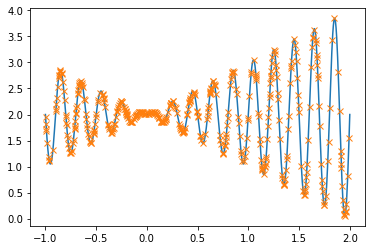

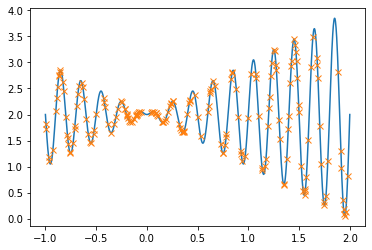

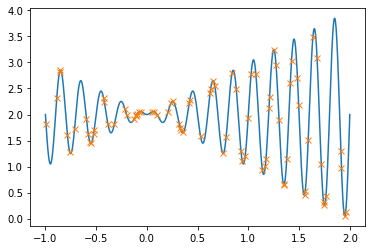

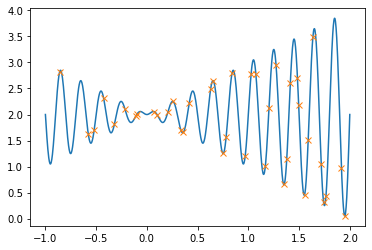

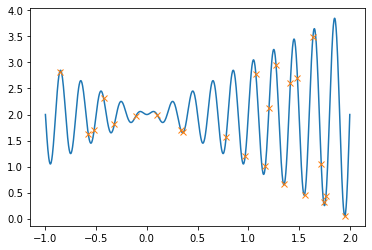

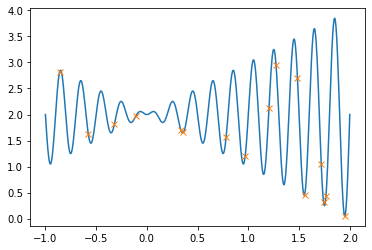

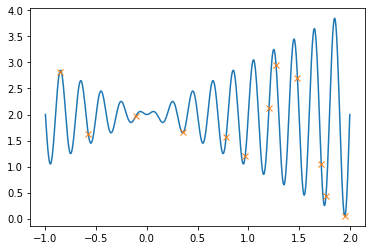

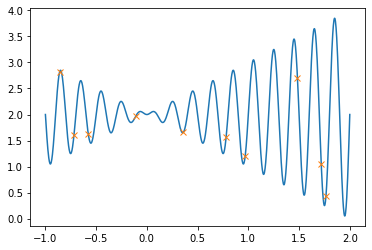

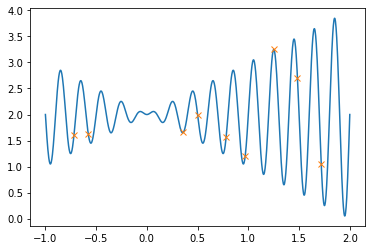

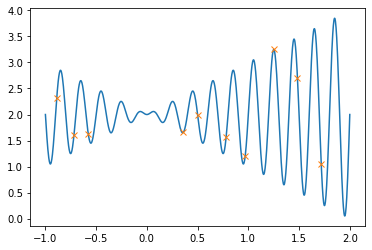

In [16]:
GA_simulate(0.01,0.8,0.9,12,1000,10)
#print(np.array(k1,dtype=object))
#plot(k1)